# Loan Approval Predictions

**This is #1 attempt of Mlzoomcamp project**

# Problem Statement:
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. 

        
* Data Columns
  * Loan_id: the Number of Loan 
  * no_of_dependents
  * education
  * self_employed
  * income_annum
  * loan_amount                 
  * loan_term                   
  * cibil_score                 
  * residential_assets_value    
  * commercial_assets_value     
  * luxury_assets_value         
  * bank_asset_value            
  * loan_status: Our target Column for prediction            


# 1. Importing Libraries Used

In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle 
import os
from sklearn.ensemble import RandomForestClassifier
import optuna

# 2. Data Exploration

In [3]:
df = pd.read_csv("./data/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## 2.1 Checking for Duplicates

In [5]:
df.duplicated().sum()

0

## 2.2 Checking for missing Values

In [6]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## 3. Preprocess the data 

## 3.1 Preprocess data Function

In [8]:
def read_dataframe(filename: str):
    df = pd.read_csv(filename)

    df.drop('loan_id',axis=1,inplace=True)
    education={' Graduate':1,' Not Graduate':0}
    self_employed ={' Yes':1,' No':0}
    loan_status={' Approved':1,' Rejected':0}
    df[' education']=df[' education'].apply(lambda x: education[x])
    df[' self_employed']=df[' self_employed'].apply(lambda x: self_employed[x])
    df[' loan_status']=df[' loan_status'].apply(lambda x: loan_status[x])
    return df


## 3.2 Storing pickle files

In [9]:
def dump_pickle(obj, filename: str):
    with open(filename, "wb") as f_out:
        return pickle.dump(obj, f_out)

## 3.3 Data Spliting

In [10]:
def run_data_prep(raw_data_path: str, dest_path: str, filename: str = "loan_approval_dataset"):
    # Load parquet files
    df = read_dataframe(
        os.path.join(raw_data_path, f"{filename}.csv")
    )
    

    # Extract the target
    X=df.drop([' loan_status'],axis=1)
    y=df[' loan_status']

    # split train and validate and test
    X_train, x_test, Y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    x_train,x_val, y_train, y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

    # Create dest_path folder unless it already exists
    os.makedirs(dest_path, exist_ok=True)

    # Save datasets
    dump_pickle((x_train, y_train), os.path.join(dest_path, "train.pkl"))
    dump_pickle((x_val, y_val), os.path.join(dest_path, "val.pkl"))
    dump_pickle((x_test, y_test), os.path.join(dest_path, "test.pkl"))

# Saving Data Pickle

In [11]:
dest_path = "./output"
raw_data_path = "./data"
run_data_prep(raw_data_path, dest_path)

# 4. Loading Data Pickle

In [12]:
def load_pickle(filename):
    with open(filename, "rb") as f_in:
        return pickle.load(f_in)

## 5. Training Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
RF = RandomForestClassifier()

In [15]:
x_train, y_train = load_pickle(os.path.join(dest_path, "train.pkl"))
x_val, y_val = load_pickle(os.path.join(dest_path, "val.pkl"))

In [16]:
RF.fit(x_train,y_train)
y_pred=RF.predict(x_val)
accuracy_score(y_val,y_pred) * 100

98.5358711566618

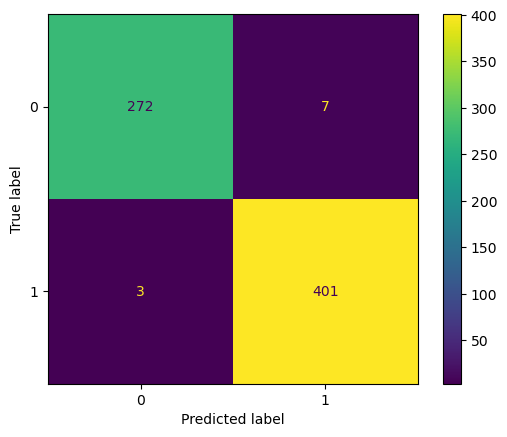

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred)).plot()

### As we can see the random forest gives higher TP and FN which means its a good fit

# Experiment Tracking

In [18]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Loan_Approval_Expirement")

<Experiment: artifact_location='mlflow-artifacts:/2', creation_time=1690624412360, experiment_id='2', last_update_time=1690624412360, lifecycle_stage='active', name='Loan_Approval_Expirement', tags={}>

In [19]:
mlflow.sklearn.autolog()

def run_train(data_path: str):
    with mlflow.start_run():
        X_train, y_train = load_pickle(os.path.join(data_path, "train.pkl"))
        X_val, y_val = load_pickle(os.path.join(data_path, "val.pkl"))

        rf = RandomForestClassifier(max_depth=10,random_state=0)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        mlflow.sklearn.autolog()
        acc = accuracy_score(y_val,y_pred) * 100
        mlflow.log_metric("accuracy", acc)
        params = {
        'max_depth': 10,
        'random_state': 0
        }
        mlflow.log_params(params)
run_train(dest_path)     

2023/07/29 13:32:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-service\lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/07/29 13:32:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\we

# Adding Optimization

In [20]:
from optuna.samplers import TPESampler
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("LoanApproval_Expirement_HPO")


2023/07/29 13:32:49 INFO mlflow.tracking.fluent: Experiment with name 'LoanApproval_Expirement_HPO' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1690626769916, experiment_id='3', last_update_time=1690626769916, lifecycle_stage='active', name='LoanApproval_Expirement_HPO', tags={}>

In [26]:
def run_optimization(data_path: str, num_trials: int):

    X_train, y_train = load_pickle(os.path.join(data_path, "train.pkl"))
    X_val, y_val = load_pickle(os.path.join(data_path, "val.pkl"))

    def objective(trial):
        with mlflow.start_run():
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 10, 50, 1),
                'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, 1),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4, 1),
                'random_state': 42,
                'n_jobs': -1
            }
            mlflow.log_param("param",params)
            rf = RandomForestClassifier(**params)
            rf.fit(X_train, y_train)
            y_pred = rf.predict(X_val)
            acc = accuracy_score(y_val, y_pred)
            mlflow.log_metric('acc',acc)
        
        return acc
    sampler = TPESampler(seed=42)
    study = optuna.create_study(direction="minimize", sampler=sampler)
    study.optimize(objective, n_trials=num_trials)

In [27]:
run_optimization(dest_path,5)

[I 2023-07-29 13:34:23,288] A new study created in memory with name: no-name-8cb4eff6-3026-4d5c-b04b-58d0df2cbae9
2023/07/29 13:34:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-service\lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/07/29 13:34:24 

[I 2023-07-29 13:34:42,713] Trial 2 finished with value: 0.9838945827232797 and parameters: {'n_estimators': 34, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.9677891654465594.
2023/07/29 13:34:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-service\lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlf

# Interacting with Model Registry

In [46]:
from mlflow.entities import ViewType
from mlflow.tracking import MlflowClient
import json
MLFLOW_TRACKING_URI = "http://127.0.0.1:5000"
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

client

In [39]:
def converttodict(str1):
    return json.loads(str1)
HPO_EXPERIMENT_NAME = "LoanApproval_Expirement_HPO"
EXPERIMENT_NAME = "LoanApproval_Expirement"
RF_PARAMS = ['max_depth', 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'random_state', 'n_jobs']


In [48]:

def train_and_log_model(data_path, params):
    X_train, y_train = load_pickle(os.path.join(data_path, "train.pkl"))
    X_val, y_val = load_pickle(os.path.join(data_path, "val.pkl"))
    with mlflow.start_run():
        for param in RF_PARAMS:
            params[param] = int(params[param])

        rf = RandomForestClassifier(**params)
        rf.fit(X_train, y_train)

        # Evaluate model on the validation and test sets
        val_acc = accuracy_score(y_val, rf.predict(X_val))*100
        mlflow.log_metric("val_acc", val_acc)
        mlflow.sklearn.log_model(rf, artifact_path="models")

In [51]:
def run_register_model(data_path: str, top_n: int):

    client = MlflowClient()

    # Retrieve the top_n model runs and log the models
    experiment = client.get_experiment_by_name(HPO_EXPERIMENT_NAME)
    runs = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=top_n,
        order_by=["metrics.acc ASC"]
    )
    for run in range(len(runs)-2):
        print(runs[run].data.params)
        param = converttodict(runs[run].data.params['param'].replace("\'", "\""))
        train_and_log_model(data_path=data_path, params=param)
    # Select the model with the highest test acc
    experiment = client.get_experiment_by_name(EXPERIMENT_NAME)
    best_run = client.search_runs(
        experiment_ids=experiment.experiment_id,
        run_view_type=ViewType.ACTIVE_ONLY,
        max_results=top_n,
        order_by=["metrics.acc DESC"])[0]

    # Register the best model
    
    model_uri = f"runs:/{best_run.info.run_id}/model"
    mlflow.register_model(model_uri=model_uri, name=EXPERIMENT_NAME)

run_register_model(dest_path,5)

{'param': "{'n_estimators': 16, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4, 'random_state': 42, 'n_jobs': -1}", 'bootstrap': 'True', 'ccp_alpha': '0.0', 'class_weight': 'None', 'criterion': 'gini', 'max_depth': '4', 'max_features': 'sqrt', 'max_leaf_nodes': 'None', 'max_samples': 'None', 'min_impurity_decrease': '0.0', 'min_samples_leaf': '4', 'min_samples_split': '2', 'min_weight_fraction_leaf': '0.0', 'n_estimators': '16', 'n_jobs': '-1', 'oob_score': 'False', 'random_state': '42', 'verbose': '0', 'warm_start': 'False'}


2023/07/29 13:43:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-service\lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/07/29 13:43:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\we

{'param': "{'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3, 'random_state': 42, 'n_jobs': -1}", 'bootstrap': 'True', 'ccp_alpha': '0.0', 'class_weight': 'None', 'criterion': 'gini', 'max_depth': '20', 'max_features': 'sqrt', 'max_leaf_nodes': 'None', 'max_samples': 'None', 'min_impurity_decrease': '0.0', 'min_samples_leaf': '3', 'min_samples_split': '8', 'min_weight_fraction_leaf': '0.0', 'n_estimators': '25', 'n_jobs': '-1', 'oob_score': 'False', 'random_state': '42', 'verbose': '0', 'warm_start': 'False'}


2023/07/29 13:44:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-service\lib\site-packages\mlflow\models\signature.py:144: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/07/29 13:44:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-s

{'param': "{'n_estimators': 22, 'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 2, 'random_state': 42, 'n_jobs': -1}", 'bootstrap': 'True', 'ccp_alpha': '0.0', 'class_weight': 'None', 'criterion': 'gini', 'max_depth': '11', 'max_features': 'sqrt', 'max_leaf_nodes': 'None', 'max_samples': 'None', 'min_impurity_decrease': '0.0', 'min_samples_leaf': '2', 'min_samples_split': '5', 'min_weight_fraction_leaf': '0.0', 'n_estimators': '22', 'n_jobs': '-1', 'oob_score': 'False', 'random_state': '42', 'verbose': '0', 'warm_start': 'False'}


2023/07/29 13:44:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-service\lib\site-packages\mlflow\models\signature.py:144: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/07/29 13:44:26 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\user\anaconda3\envs\web-s

In [52]:
latest_versions = client.get_latest_versions(name=EXPERIMENT_NAME)

for version in latest_versions:
    print(f"version: {version.version}, stage: {version.current_stage}")

version: 3, stage: None


In [53]:
model_version = 3
new_stage = "Staging"
client.transition_model_version_stage(
    name=EXPERIMENT_NAME,
    version=model_version,
    stage=new_stage,
    archive_existing_versions=False
)

<ModelVersion: aliases=[], creation_timestamp=1690627472324, current_stage='Staging', description='', last_updated_timestamp=1690627485482, name='LoanApproval_Expirement', run_id='4a72e6d2793d49d5972c8976e3bf5787', run_link='', source='file:///C:/Users/user/Desktop/Projectmlzoomcamp/MLOPSZoomcampProject/mlruns/1/4a72e6d2793d49d5972c8976e3bf5787/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='3'>

In [54]:
from datetime import datetime

date = datetime.today().date()
client.update_model_version(
    name=EXPERIMENT_NAME,
    version=model_version,
    description=f"The model version {model_version} was transitioned to {new_stage} on {date}"
)

<ModelVersion: aliases=[], creation_timestamp=1690627472324, current_stage='Staging', description='The model version 3 was transitioned to Staging on 2023-07-29', last_updated_timestamp=1690627514266, name='LoanApproval_Expirement', run_id='4a72e6d2793d49d5972c8976e3bf5787', run_link='', source='file:///C:/Users/user/Desktop/Projectmlzoomcamp/MLOPSZoomcampProject/mlruns/1/4a72e6d2793d49d5972c8976e3bf5787/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='3'>

# Selecting Production Model

In [57]:
model_name=EXPERIMENT_NAME
run_id= "cc46a78cc94c40ee8ece05d00415d749" # got it from mlflow ui

In [67]:
client.transition_model_version_stage(
    name=model_name,
    version=3,
    stage="Production",
    archive_existing_versions=True
)

<ModelVersion: aliases=[], creation_timestamp=1690627472324, current_stage='Production', description='The model version 3 was transitioned to Staging on 2023-07-29', last_updated_timestamp=1690628028137, name='LoanApproval_Expirement', run_id='4a72e6d2793d49d5972c8976e3bf5787', run_link='', source='file:///C:/Users/user/Desktop/Projectmlzoomcamp/MLOPSZoomcampProject/mlruns/1/4a72e6d2793d49d5972c8976e3bf5787/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='3'>

### Finally Converting this to python script to add The orchestration by using 
`jupyter nbconvert --to script 'my-notebook.ipynb'`